In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stay offline for plotly
init_notebook_mode(connected=True)

In [8]:
# using sample data from https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/sample_data/percent_bachelors_degrees_women_usa.csv
file_name = "../data/percent_bachelors_degrees_women_usa.csv"

In [9]:
# extract extension
extension = file_name.rsplit('.', 1)[1].lower() 

# process into dataframe
if extension == 'csv':
    try:
        df = pd.read_csv(file_name)
    except:
        df = pd.read_csv(file_name, encoding='latin-1')

In [10]:
df.tail()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
37,2007,47.605026,43.100459,61.4,59.411993,49.000459,62.5,17.6,78.721413,16.8,67.874923,70.2,85.4,44.1,40.7,77.1,82.1,49.3
38,2008,47.570834,42.711730,60.7,59.305765,48.888027,62.4,17.8,79.196327,16.5,67.594028,70.2,85.2,43.3,40.7,77.2,81.7,49.4
39,2009,48.667224,43.348921,61.0,58.489583,48.840474,62.8,18.1,79.532909,16.8,67.969792,69.3,85.1,43.3,40.7,77.1,82.0,49.4
40,2010,48.730042,42.066721,61.3,59.010255,48.757988,62.5,17.6,79.618625,17.2,67.928106,69.0,85.0,43.1,40.2,77.0,81.7,49.3
41,2011,50.037182,42.773438,61.2,58.742397,48.180418,62.2,18.2,79.432812,17.5,68.426730,69.5,84.8,43.1,40.1,76.7,81.9,49.2


or example, with demographic data, we we generally consider correlations above 0.75 to be relatively strong; correlations between 0.45 and 0.75 are moderate, and those below 0.45 are considered weak.

In [11]:
# find correlations
corrs = pd.DataFrame(df.corr().abs().unstack().sort_values(kind="quicksort"))

# remove correlations of 1
corrs = corrs[corrs[0] < 1]

# only compute if there are correlations to work with
if len(corrs.index) > 0:
    # extract highest correlation
    highest_corr = round(corrs.iloc[-1][0], 2)
    highest_corr_y = corrs.iloc[-1].name[0]
    highest_corr_x = corrs.iloc[-1].name[1]

    # compute whether it's a strong correlation
    if highest_corr > 0.75:
        correlation_strength = 'high'
    elif highest_corr > 0.45:
        correlation_strength = 'moderate'
    else:
        correlation_strength = 'weak'

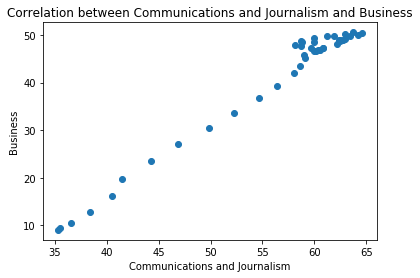

In [12]:
plt.scatter(df[highest_corr_x], df[highest_corr_y])
plt.title(f'Correlation between {highest_corr_x} and {highest_corr_y}')
plt.xlabel(highest_corr_x)
plt.ylabel(highest_corr_y)
plt.show()

In [13]:
print(f'There is a {correlation_strength} correlation between {highest_corr_x} and {highest_corr_y}.')

There is a high correlation between Communications and Journalism and Business.


In [49]:
fig = go.Figure(data=go.Scatter(x=df[highest_corr_x], y=df[highest_corr_y], 
                                mode='markers', marker_color='rgb(227, 0, 6)'))

fig.update_layout(
    title=f'Correlation between {highest_corr_x} and {highest_corr_y}',
    xaxis_title=highest_corr_x,
    yaxis_title=highest_corr_y,
    margin=dict(
        pad=10
    ),
    font=dict(
        family="-apple-system, BlinkMacSystemFont, 'Segoe UI', 'PingFang SC', 'Hiragino Sans GB', 'Microsoft YaHei', 'Helvetica Neue', Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';",
        size=12,
        color="#7f7f7f"
    )
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#EEEEEE')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#EEEEEE')

fig['layout']['plot_bgcolor'] = 'rgba(0,0,0,0)'
fig.show()

In [27]:
output_json = fig.to_json()

print(output_json)

{"data":[{"marker":{"color":"rgb(227, 0, 6)"},"mode":"markers","type":"scatter","x":[35.3,35.5,36.6,38.4,40.5,41.5,44.3,46.9,49.9,52.3,54.7,56.4,58.0,58.6,59.1,59.0,60.0,60.2,60.4,60.5,60.8,60.8,59.7,58.7,58.1,58.8,58.7,60.0,60.0,61.2,61.9,63.0,63.7,64.6,64.2,63.4,63.0,62.5,62.4,62.8,62.5,62.2],"y":[9.064438975,9.503186593999999,10.5589621,12.80460152,16.20485038,19.68624931,23.4300375,27.16342715,30.52751868,33.62163381,36.76572529,39.26622984,41.94937335,43.54206966,45.12403027,45.747782,46.53291505,46.69046648,46.7648277,46.7815648,47.20085084,47.22432481,47.21939541,47.63933161,47.98392441,48.57318101,48.6473926,48.56105033,49.2585152,49.81020815,49.80361649,50.27514494,50.5523346,50.34559774,49.95089449,49.79185139,49.21091439,49.00045935,48.88802678,48.84047414,48.75798769,48.18041792]}],"layout":{"plot_bgcolor":"rgba(0,0,0,0)","template":{"data":{"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5}},"type":"bar"}],"